### Тема “Обучение без учителя”


### Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:

n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.


In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [153]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [154]:
boston = load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [156]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [157]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


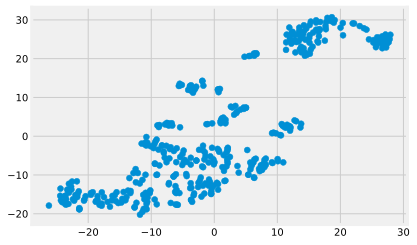

In [158]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

### Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.

Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.


In [159]:
from sklearn.cluster import KMeans

In [160]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)


In [161]:
labels_train = kmeans.fit_predict(X_train_scaled)

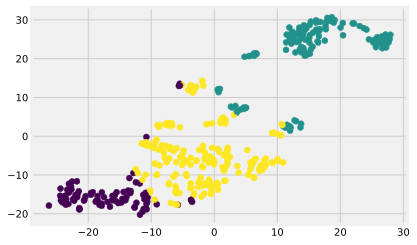

In [162]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

In [163]:
print(f'Среднее значение price на всех данных: {y_train.mean()}\n\
Среднее значение price на кластере 0:  {y_train[labels_train==0].mean()}\n\
Среднее значение price на кластере 1:  {y_train[labels_train==1].mean()}\n\
Среднее значение price на кластере 2:  {y_train[labels_train==2].mean()}\n ')
        

Среднее значение price на всех данных: 22.796534653465343
Среднее значение price на кластере 0:  27.78837209302326
Среднее значение price на кластере 1:  16.165354330708663
Среднее значение price на кластере 2:  24.958115183246072
 


In [164]:
print(f"Среднее значение CRIM на всех данных: {X_train['CRIM'].mean()}")
print(f"Среднее значение CRIM на кластере 0:  {X_train.loc[labels_train==0, 'CRIM'].mean()}")
print(f"Среднее значение CRIM на кластере 1:  {X_train.loc[labels_train==1, 'CRIM'].mean()}")
print(f"Среднее значение CRIM на кластере 2:  {X_train.loc[labels_train==2, 'CRIM'].mean()}")

Среднее значение CRIM на всех данных: 3.609124628712873
Среднее значение CRIM на кластере 0:  0.07356558139534886
Среднее значение CRIM на кластере 1:  10.797028425196853
Среднее значение CRIM на кластере 2:  0.42166020942408367


Средние значения цены и уровня преступности различаются по кластерам, причем чем выше уровень преступности, тем ниже цена. Однако средний уровень преступности у класстера 1 слишком высокий, что наводит на мысль о наличии выбросов

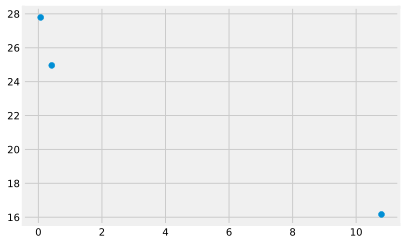

In [170]:
arr1=[X_train.loc[labels_train==i, 'CRIM'].mean() for i in [0, 1, 2]]
arr2=[y_train[labels_train==i].mean() for i in [0, 1, 2]]

plt.scatter(arr1, arr2)

### * Задание 3

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [173]:
labels_test = kmeans.predict(X_test_scaled)

In [174]:
print(f'Среднее значение price на всех данных: {y_test.mean()}\n\
Среднее значение price на кластере 0:  {y_test[labels_test==0].mean()}\n\
Среднее значение price на кластере 1:  {y_test[labels_test==1].mean()}\n\
Среднее значение price на кластере 2:  {y_test[labels_test==2].mean()}\n ')

Среднее значение price на всех данных: 21.488235294117644
Среднее значение price на кластере 0:  31.35
Среднее значение price на кластере 1:  16.43714285714286
Среднее значение price на кластере 2:  21.860784313725492
 


In [175]:
print(f"Среднее значение CRIM на всех данных: {X_test['CRIM'].mean()}")
print(f"Среднее значение CRIM на кластере 0:  {X_test.loc[labels_test==0, 'CRIM'].mean()}")
print(f"Среднее значение CRIM на кластере 1:  {X_test.loc[labels_test==1, 'CRIM'].mean()}")
print(f"Среднее значение CRIM на кластере 2:  {X_test.loc[labels_test==2, 'CRIM'].mean()}")

Среднее значение CRIM на всех данных: 3.630946764705883
Среднее значение CRIM на кластере 0:  0.062060000000000004
Среднее значение CRIM на кластере 1:  10.165531142857143
Среднее значение CRIM на кластере 2:  0.26607882352941176


В данном случае различия в средних ценах получились даже больше, чем на тренировочной выборке

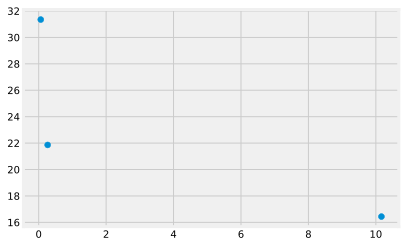

In [178]:
arr1=[X_test.loc[labels_test==i, 'CRIM'].mean() for i in [0, 1, 2]]
arr2=[y_test[labels_test==i].mean() for i in [0, 1, 2]]

plt.scatter(arr1, arr2)

Обратная зависимость сохраняется

### Конец официальной части д/з

Так как для TNSE нет метода transform, то для того чтобы построить двумерную диаграмму рассеяния построим отдельную модель TNSE, 
но расскрашивание точек сделаем на основе уже построенного разбиения на кластеры


In [179]:
tsne_test = TSNE(n_components=2, learning_rate=250, random_state=42)

X_test_tsne = tsne_test.fit_transform(X_test_scaled)

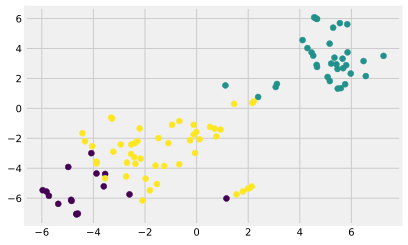

In [180]:
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)

plt.show()

In [182]:
kmeans.inertia_

2820.5177072919746

Значение inertia получилось очень большим. Посмотрим, можно ли его уменьшить за счет изменения кол-ва кластеров

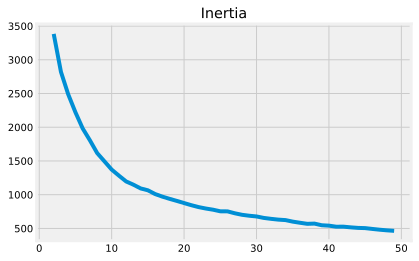

In [183]:
inertias = []

for i in range(2, 50):
    kmeans_tmp = KMeans(n_clusters=i, max_iter=100, random_state=42)
    labels_train_tmp = kmeans_tmp.fit_predict(X_train_scaled)
    
    inertias.append(kmeans_tmp.inertia_)

plt.plot(range(2, 50), inertias)

plt.title('Inertia')

plt.show()

Даже для 50 кластеров значение  inertia около 500, что очень много. Попробуем поработать с выбросами CRIM

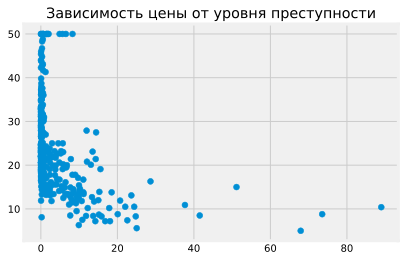

In [184]:
plt.scatter(X_train.loc[:, 'CRIM'], y_train)

plt.title('Зависимость цены от уровня преступности')
plt.show()

Видим, что действительно есть очень высокие значения CRIM, которым соответствует довольно низкий уровень цен

На всякий случай проверим, что один из кластеров не получился слишком маленьким

In [88]:
np.array(np.unique(labels_train, return_counts=True)).T

array([[  0,  86],
       [  1, 127],
       [  2, 191]], dtype=int64)

И посмотрим стандартное отклонение CRIM внутри каждого кластера

In [185]:
print(f"Стандартное отклонение CRIM на всех данных: {X_test['CRIM'].std()}")
print(f"Стандартное отклонение CRIM на кластере 0:  {X_test.loc[labels_test==0, 'CRIM'].std()}")
print(f"Стандартное отклонение CRIM на кластере 1:  {X_test.loc[labels_test==1, 'CRIM'].std()}")
print(f"Стандартное отклонение CRIM на кластере 2:  {X_test.loc[labels_test==2, 'CRIM'].std()}")

Стандартное отклонение CRIM на всех данных: 7.459607291458348
Стандартное отклонение CRIM на кластере 0:  0.0463854681267025
Стандартное отклонение CRIM на кластере 1:  9.910654031866791
Стандартное отклонение CRIM на кластере 2:  0.313472790153449


In [186]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [187]:
X['CRIM'].mode()[0]

0.01501

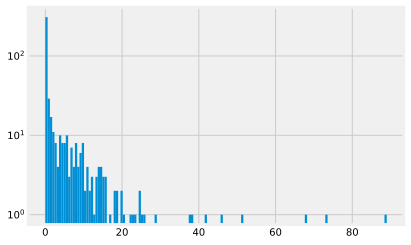

In [192]:
plt.hist(X['CRIM'], bins=150, log=True)

plt.show()

Попрум выбросить из рассмотрения часть данных со слишком высоким уровнем преступности

In [224]:
X_new = X.loc[X['CRIM']<18]
y_new = y[X['CRIM']<18]

In [225]:
X_new.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000
mean,2.212084,11.880165,10.820269,0.072314,0.549237,6.320849,67.335950,3.897500,8.892562,396.520661,18.376240,360.790331,12.094897
std,3.865047,23.718416,6.848305,0.259275,0.115314,0.672765,28.133961,2.095772,8.326218,162.894654,2.180725,84.652294,6.612740
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.078935,0.000000,5.130000,0.000000,0.448000,5.911000,42.550000,2.181375,4.000000,277.000000,16.975000,376.140000,6.772500
50%,0.224635,0.000000,8.560000,0.000000,0.524000,6.221000,74.850000,3.366650,5.000000,329.000000,18.700000,391.600000,10.805000
75%,2.340397,20.000000,18.100000,0.000000,0.614000,6.630250,93.325000,5.287300,8.000000,437.000000,20.200000,396.080000,16.222500
max,17.866700,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.770000


До:	(387, 13)
После:	(387, 2)


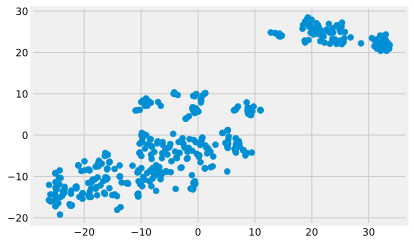

In [226]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

scaler_new = StandardScaler()

X_train_scaled_new = pd.DataFrame(scaler_new.fit_transform(X_train_new), columns=X_train_new.columns)
X_test_scaled_new = pd.DataFrame(scaler_new.transform(X_test_new), columns=X_test_new.columns)

tsne_new = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne_new = tsne_new.fit_transform(X_train_scaled_new)

print('До:\t{}'.format(X_train_scaled_new.shape))
print('После:\t{}'.format(X_train_tsne_new.shape))

plt.scatter(X_train_tsne_new[:, 0], X_train_tsne_new[:, 1])

plt.show()

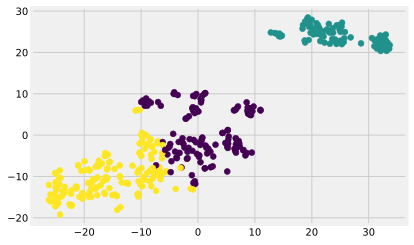

In [227]:
kmeans_new = KMeans(n_clusters=3, max_iter=100, random_state=42)

labels_train_new = kmeans_new.fit_predict(X_train_scaled_new)

plt.scatter(X_train_tsne_new[:, 0], X_train_tsne_new[:, 1], c=labels_train_new)

plt.show()

Разделение на классы получилось визуально более четким

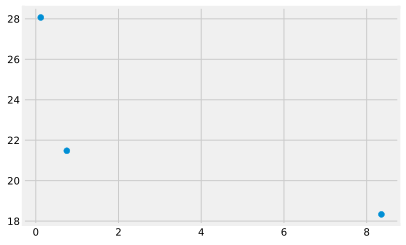

In [205]:
arr1=[X_train_new.loc[labels_train_new==i, 'CRIM'].mean() for i in [0, 1, 2]]
arr2=[y_train_new[labels_train_new==i].mean() for i in [0, 1, 2]]

plt.scatter(arr1, arr2)

In [206]:
kmeans_new.inertia_

2594.496656864265

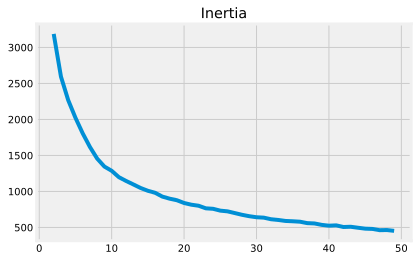

In [208]:
inertias = []

for i in range(2, 50):
    kmeans_tmp = KMeans(n_clusters=i, max_iter=100, random_state=42)
    labels_train_tmp = kmeans_tmp.fit_predict(X_train_scaled_new)
    
    inertias.append(kmeans_tmp.inertia_)

plt.plot(range(2, 50), inertias)

plt.title('Inertia')

plt.show()

Произведенные манипуляции на значения inertia почти не повлияли.

Посмотрим, что будет с r2-score линейном регрессии, построенной на этих данных

In [209]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()

lr.fit(X_train_scaled, y_train)

y_test_pred = lr.predict(X_test_scaled)

r2_score(y_test, y_test_pred)

0.668759493535632

Это базовое значение на исходных данных.

Посмотрим базовое значение на данных, из которых выброшены 22 строки с большим уровнем преступности

In [228]:
lr_new = LinearRegression()

lr_new.fit(X_train_scaled_new, y_train_new)

y_test_pred_new = lr_new.predict(X_test_scaled_new)

r2_score(y_test_new, y_test_pred_new)

0.7791876856373725

Существенно выше.

Теперь считаем r2 отдельно внутри каждого класса и объединяем

In [211]:
lr.fit(X_train_scaled.loc[labels_train == 0], y_train[labels_train == 0])
y_test_pred_0 = lr.predict(X_test_scaled.loc[labels_test == 0])

lr.fit(X_train_scaled.loc[labels_train == 1], y_train[labels_train == 1])
y_test_pred_1 = lr.predict(X_test_scaled.loc[labels_test == 1])

lr.fit(X_train_scaled.loc[labels_train == 2], y_train[labels_train == 2])
y_test_pred_2 = lr.predict(X_test_scaled.loc[labels_test == 2])


r2_score(np.hstack([y_test[labels_test == 0], y_test[labels_test == 1], y_test[labels_test == 2]]), \
         np.hstack([y_test_pred_0, y_test_pred_1, y_test_pred_2]))

0.7954287338822921

In [220]:
labels_test_new = kmeans_new.predict(X_test_scaled_new)

In [229]:
lr_new.fit(X_train_scaled_new.loc[labels_train_new == 0], y_train_new[labels_train_new == 0])
y_test_pred_0_new= lr_new.predict(X_test_scaled_new.loc[labels_test_new == 0])

r2_score(y_test_new[labels_test_new == 0], y_test_pred_0_new)

0.645947079706384

In [230]:
lr_new.fit(X_train_scaled_new.loc[labels_train_new == 1], y_train_new[labels_train_new == 1])
y_test_pred_1_new= lr_new.predict(X_test_scaled_new.loc[labels_test_new == 1])

r2_score(y_test_new[labels_test_new == 1], y_test_pred_1_new)

-1.558082116321495e+19

In [231]:
lr_new.fit(X_train_scaled_new.loc[labels_train_new == 2], y_train_new[labels_train_new == 2])
y_test_pred_2_new= lr_new.predict(X_test_scaled_new.loc[labels_test_new == 2])

r2_score(y_test_new[labels_test_new == 2], y_test_pred_2_new)

0.9111318077820394

Для кластера 1 r2_score получилось отрицательным.

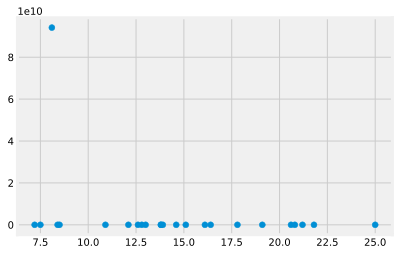

In [261]:
plt.scatter(y_test_new[labels_test_new == 1], y_test_pred_1_new)

plt.show()

In [252]:
Z = pd.DataFrame([y_test_new[labels_test_new == 1], y_test_pred_1_new]).T

Z.columns = ['real','regr']


In [263]:
Z.loc[Z['regr']>10000000]

,real,regr
16,8.1,9.413931e+10


r2_score отрицательный из-за этого прогноза

Попробуем построить модель с двумя кластерами

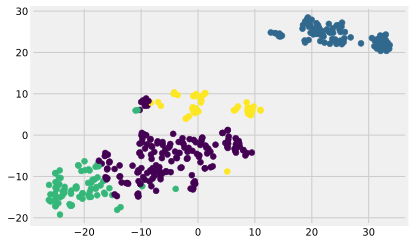

In [267]:
kmeans_new = KMeans(n_clusters=4, max_iter=100, random_state=42)

labels_train_new = kmeans_new.fit_predict(X_train_scaled_new)

plt.scatter(X_train_tsne_new[:, 0], X_train_tsne_new[:, 1], c=labels_train_new)

plt.show()

In [269]:
labels_test_new = kmeans_new.predict(X_test_scaled_new)

In [270]:
lr_new.fit(X_train_scaled_new.loc[labels_train_new == 0], y_train_new[labels_train_new == 0])
y_test_pred_0_new= lr_new.predict(X_test_scaled_new.loc[labels_test_new == 0])

r2_score(y_test_new[labels_test_new == 0], y_test_pred_0_new)

0.8255523064517539

In [271]:
lr_new.fit(X_train_scaled_new.loc[labels_train_new == 1], y_train_new[labels_train_new == 1])
y_test_pred_1_new= lr_new.predict(X_test_scaled_new.loc[labels_test_new == 1])

r2_score(y_test_new[labels_test_new == 1], y_test_pred_1_new)

0.19091222330005153

In [272]:
lr_new.fit(X_train_scaled_new.loc[labels_train_new == 2], y_train_new[labels_train_new == 2])
y_test_pred_2_new= lr_new.predict(X_test_scaled_new.loc[labels_test_new == 2])

r2_score(y_test_new[labels_test_new == 2], y_test_pred_2_new)

0.9256250155108983

In [273]:
lr_new.fit(X_train_scaled_new.loc[labels_train_new == 3], y_train_new[labels_train_new == 3])
y_test_pred_3_new= lr_new.predict(X_test_scaled_new.loc[labels_test_new == 3])

r2_score(y_test_new[labels_test_new == 3], y_test_pred_3_new)

-0.06221404738297798

### Вопросы

1. Почему значение inertia получается таким большим? Говорит ли это о том, что модель плохая? Как улучшить ситуацию?

2. Почему при построении модели на измененных данных при трез и четырех кластерах каждый раз по одному из кластеров r2_score получается отрицательным (и из-за этого r2_score отрицатальный на объединенных данных). В чем моя ошибка?

Может быть проблема в том, что тестовая выборка слишком маленькая (20%)?

3. Не получилось построить график с центроидами: они получаются совсем далеко от данных (считаю, что при построении обратное преобразование делать не нужно, но на всякий случай постороила два варианта. В обоих случаях точки явно не в центе кластеров)

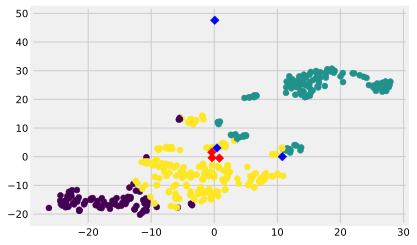

In [278]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='D', color='red')
plt.scatter(scaler.inverse_transform(kmeans.cluster_centers_)[:, 0], scaler.inverse_transform(kmeans.cluster_centers_)[:, 1], marker='D', color='blue')

plt.show()